In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('heart_disease.csv',sep=',')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [16]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


there are outliers present as huge in 75% and maximum value.


# data visualization

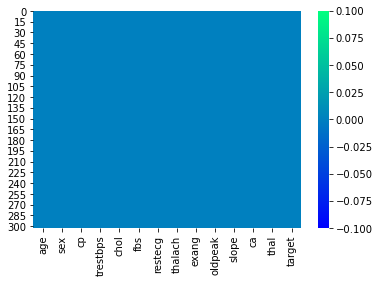

In [20]:
sns.heatmap(df.isnull(),cmap='winter')

no null values

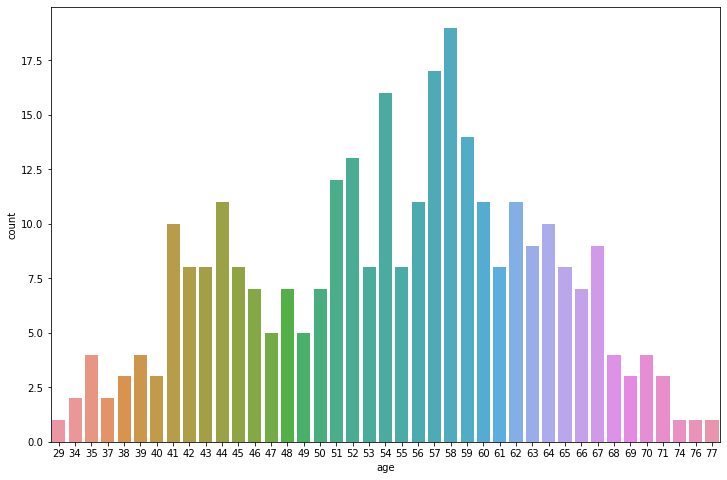

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['age'])

most of the people are of age 58.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000157B1D94BE0>,
      dtype=object)

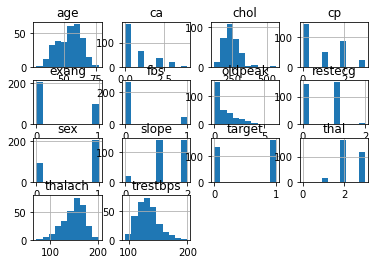

In [22]:
df.hist()

In [23]:
collist=df.columns.values
ncol=8
nrow=5
collist

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

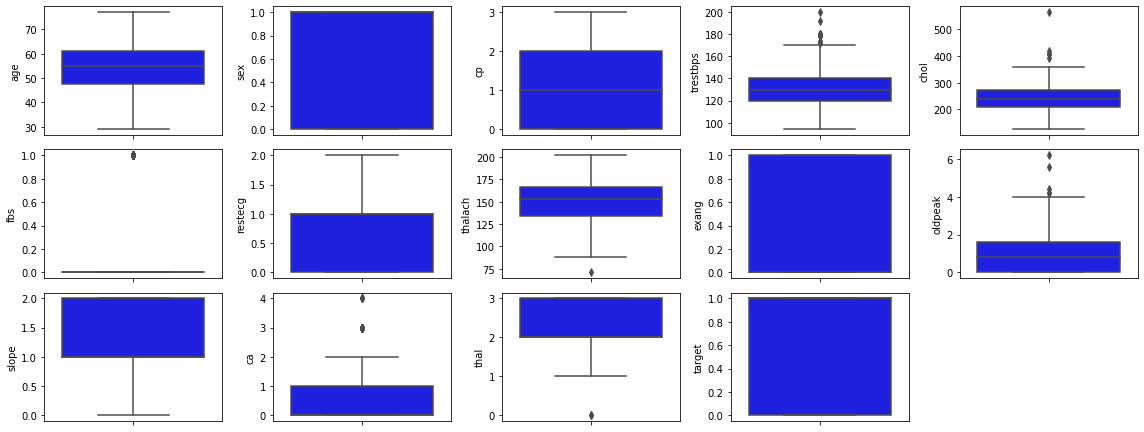

In [24]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(ncol,nrow,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

outliers are present in the above boxplots.

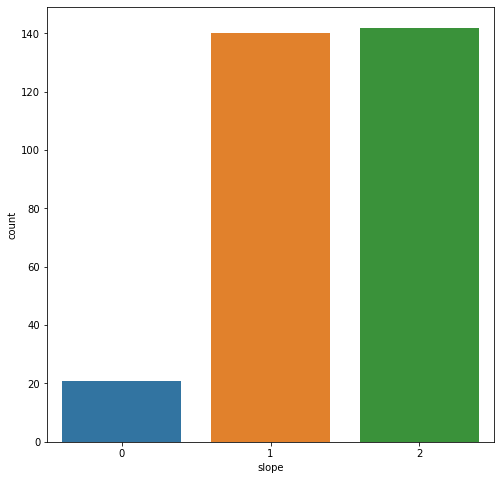

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['slope'])

most people lie in the range of slope 2.

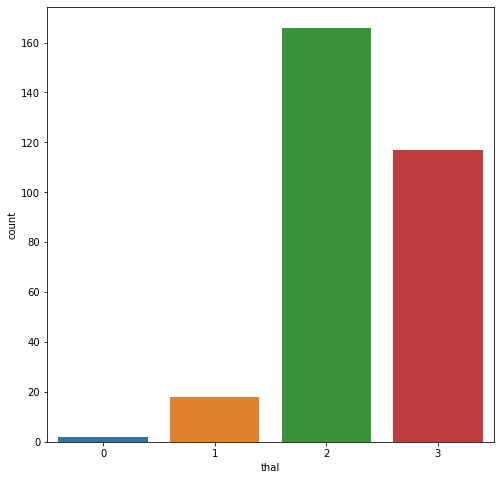

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['thal'])

most people lie in the range of thal 2.

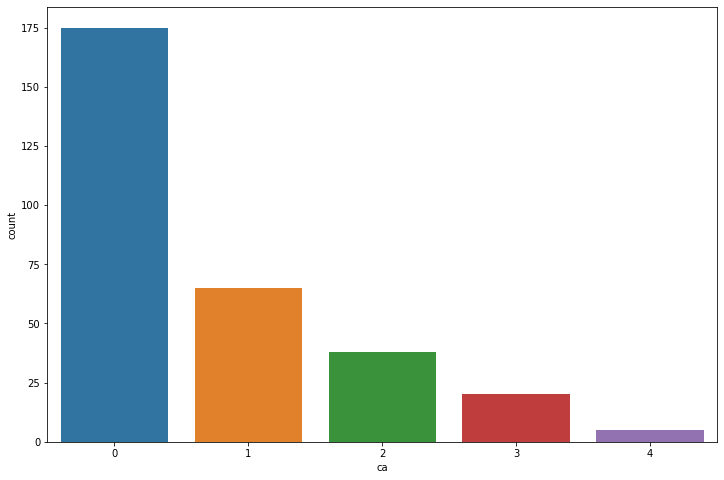

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['ca'])

maximum people lie in 0 count for ca column and least lie in 4 ca.

# bivirate analysis

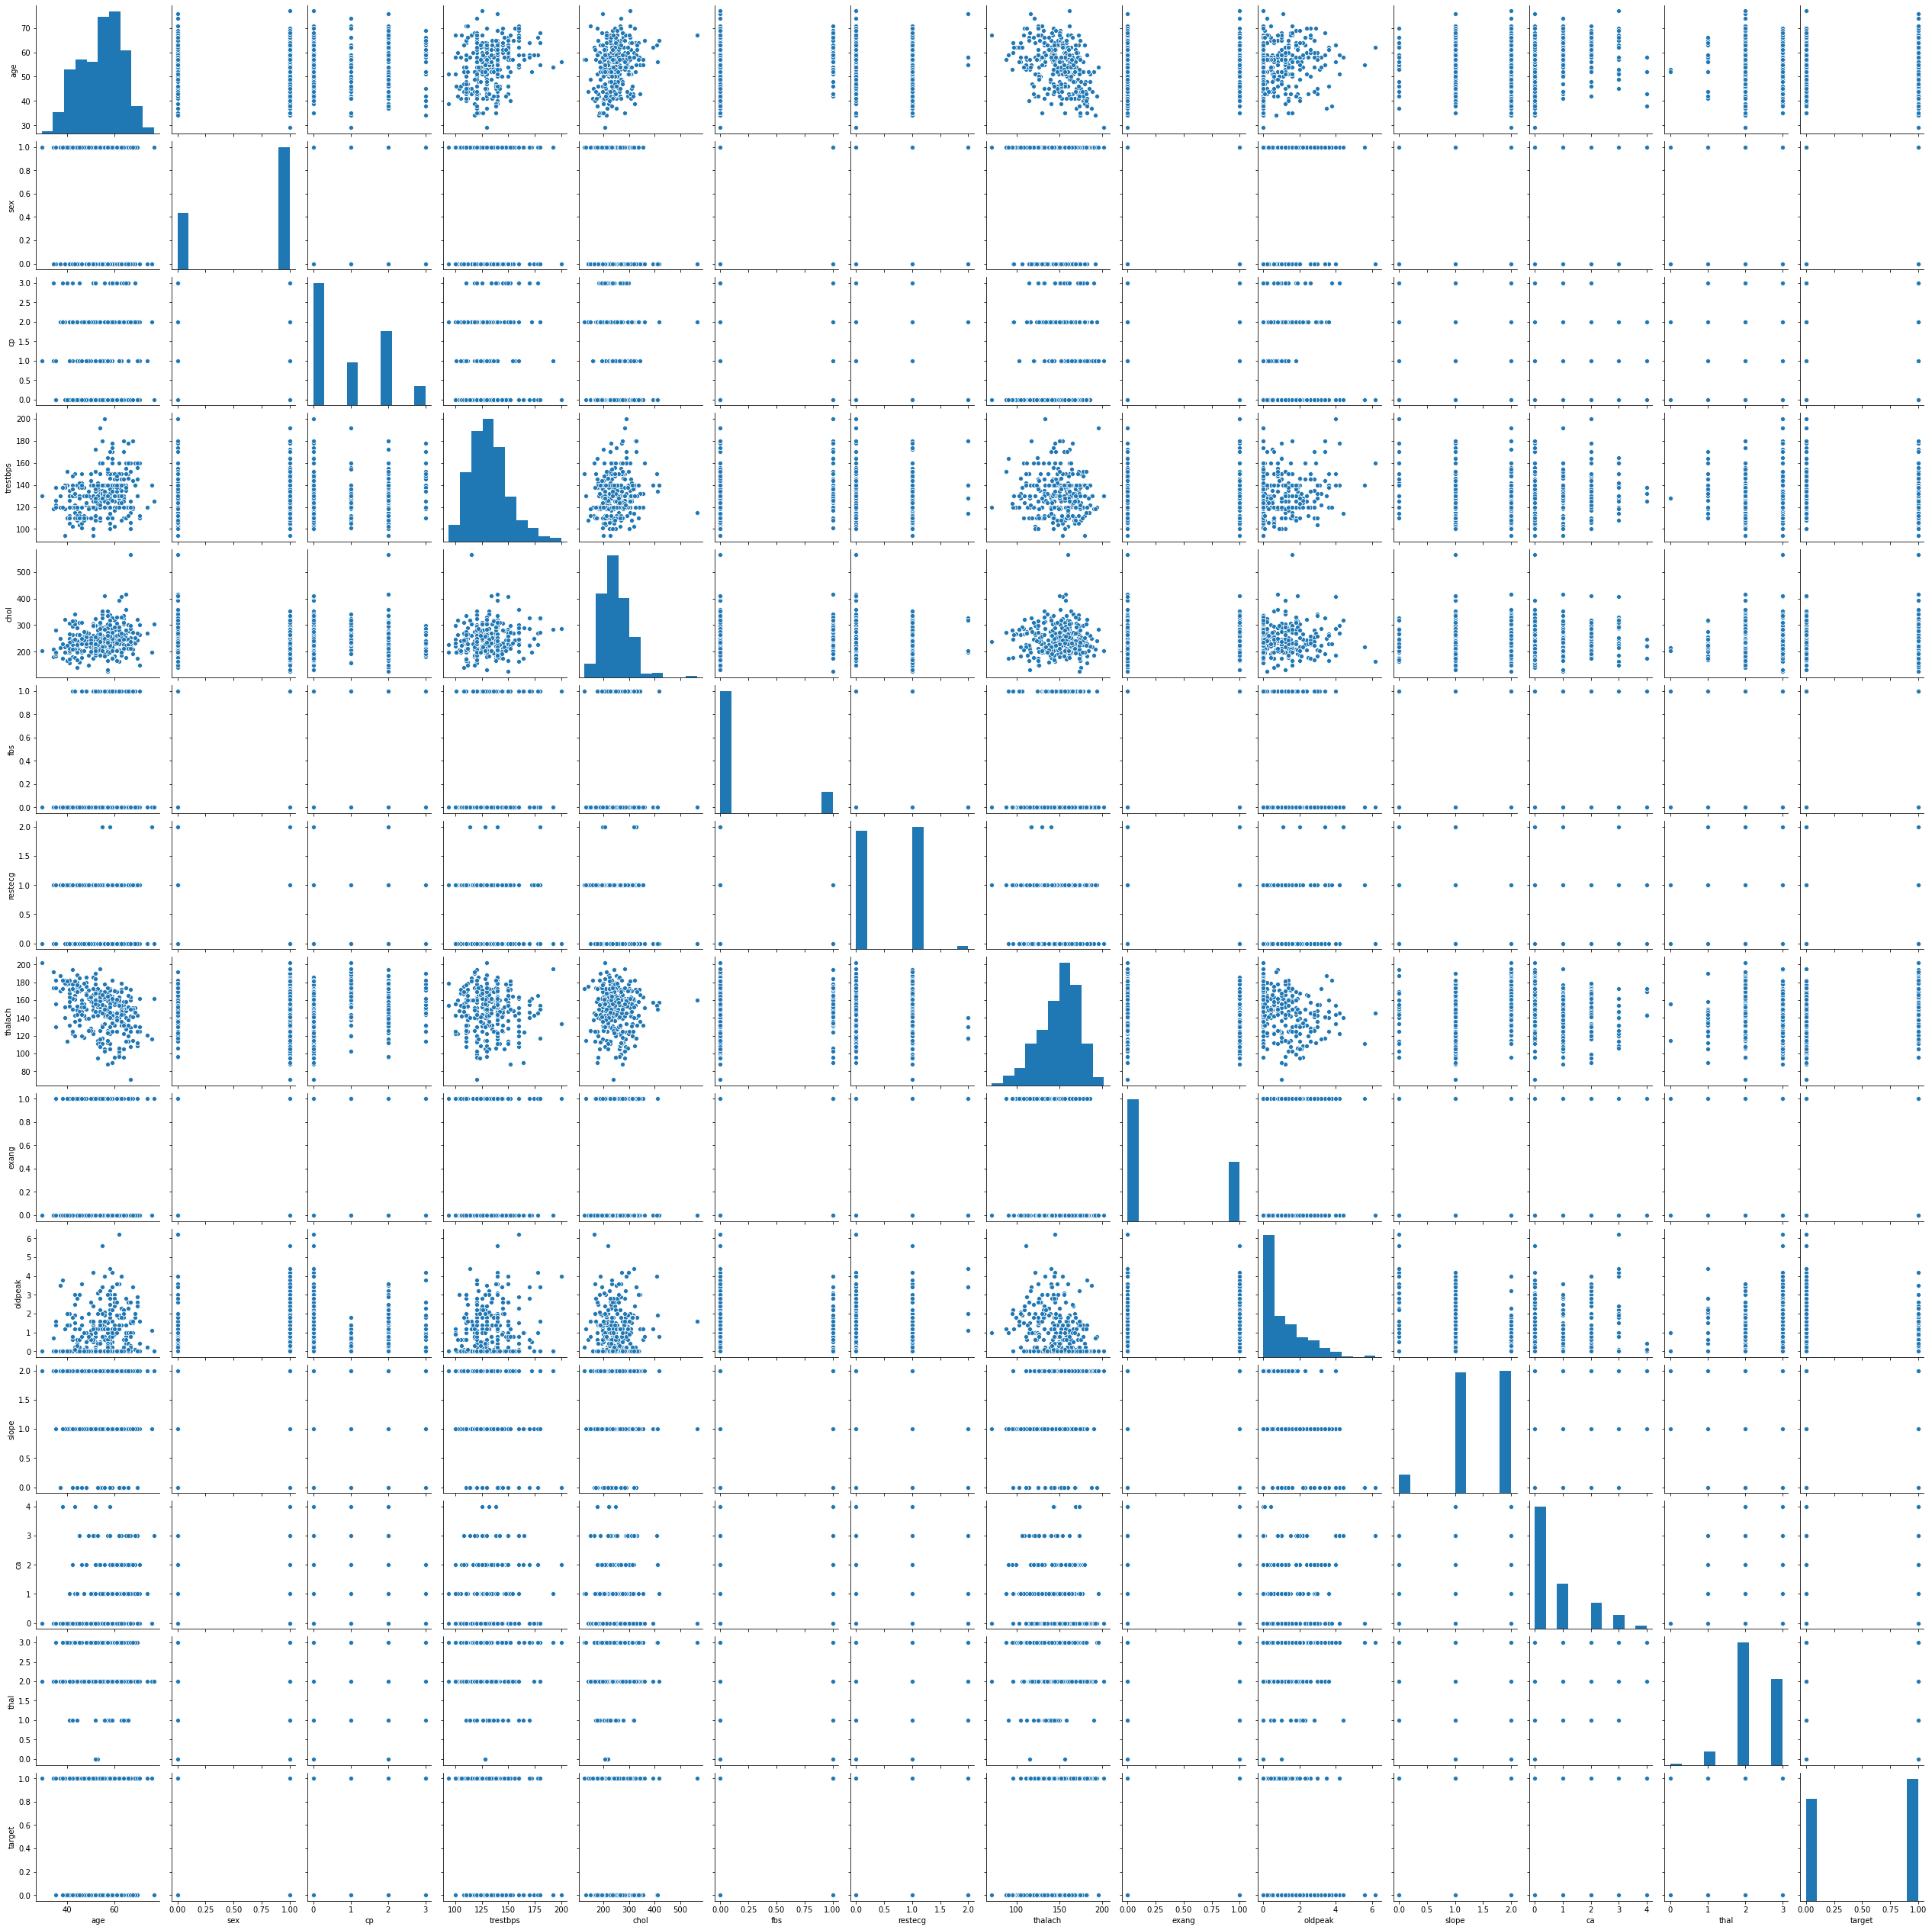

In [48]:
sns.pairplot(df)

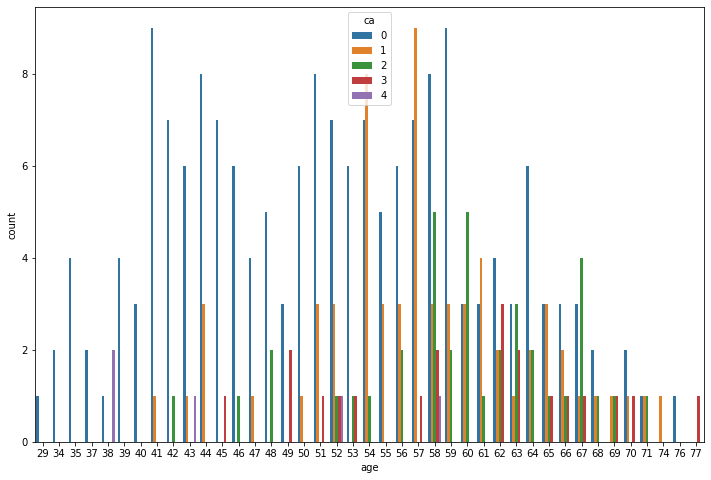

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='age',hue='ca',data=df)

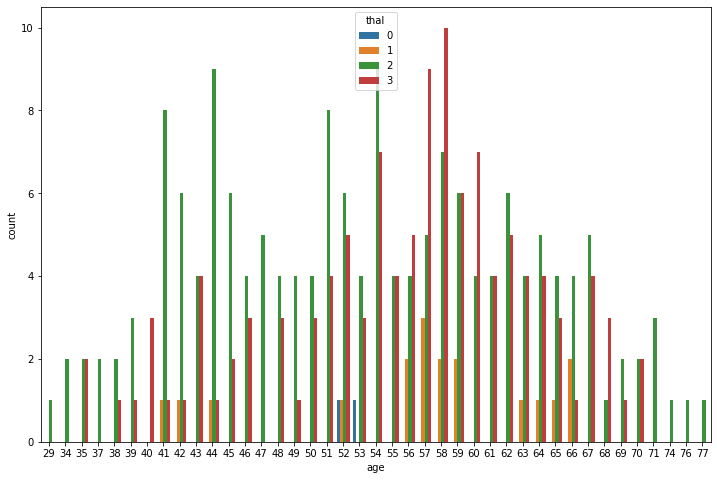

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x='age',hue='thal',data=df)

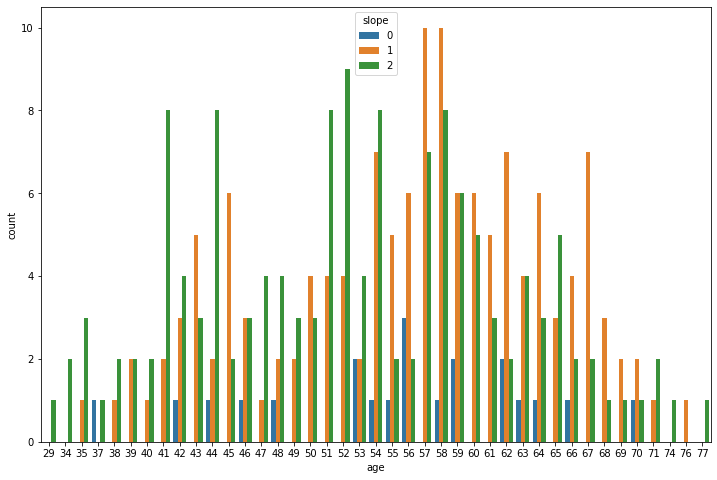

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='age',hue='slope',data=df)

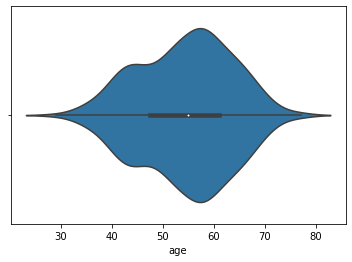

In [31]:
sns.violinplot(df['age'])

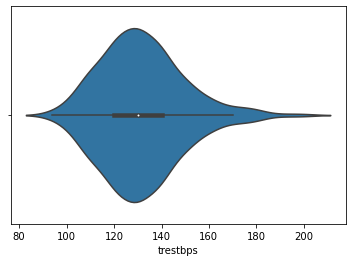

In [32]:
sns.violinplot(df['trestbps'])

In [33]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [34]:
df['fbs']=np.log1p(df['fbs'])

In [35]:
df['trestbps']=np.log1p(df['trestbps'])

In [36]:
df['chol']=np.log1p(df['chol'])

In [37]:
df['ca']=np.log1p(df['ca'])

after skewness we will check for correlation.

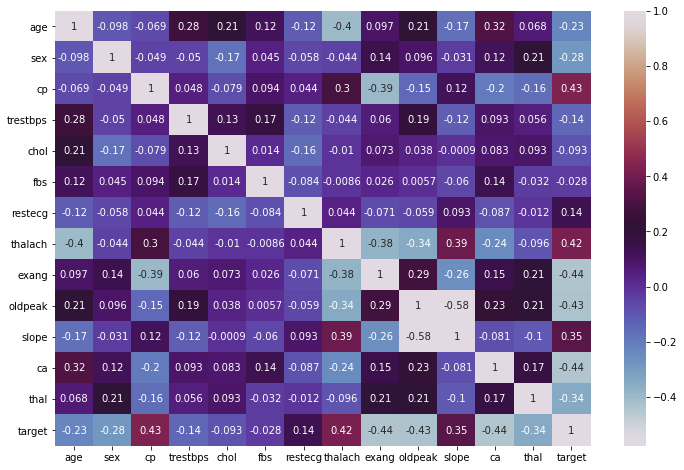

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='twilight',annot=True)

# removing the outliers

In [39]:
threshold=3

In [40]:
z=np.abs(zscore(df))

In [41]:
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new.shape

(295, 14)

all the outliers have been removed now.

# model selection

In [43]:
x=df_new.drop(['target'],axis=1)

In [44]:
y=df_new['target']

In [45]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95982622,  0.67320277,  1.9655108 , ..., -2.34114544,
        -0.79453912, -2.26430833],
       [-1.89250508,  0.67320277,  0.99590263, ..., -2.34114544,
        -0.79453912, -0.54715934],
       [-1.45368488, -1.48543655,  0.02629446, ...,  0.97126657,
        -0.79453912, -0.54715934],
       ...,
       [ 1.50835146,  0.67320277, -0.94331371, ..., -0.68493943,
         1.36215652,  1.16998965],
       [ 0.30159592,  0.67320277, -0.94331371, ..., -0.68493943,
         0.56618433,  1.16998965],
       [ 0.30159592, -1.48543655,  0.02629446, ..., -0.68493943,
         0.56618433, -0.54715934]])

In [46]:
x=pd.DataFrame(x)

In [47]:
model=[LogisticRegression(),GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]

In [48]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=43)
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('the confusion matrix of',m,'is:',confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('________________________________________________________________________________________________________')

0.8601694915254238
the accuracy score of LogisticRegression() is: 0.847457627118644
the confusion matrix of LogisticRegression() is: [[17  8]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        25
           1       0.80      0.97      0.88        34

    accuracy                           0.85        59
   macro avg       0.87      0.83      0.84        59
weighted avg       0.86      0.85      0.84        59

________________________________________________________________________________________________________
0.8305084745762712
the accuracy score of GaussianNB() is: 0.8813559322033898
the confusion matrix of GaussianNB() is: [[19  6]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.90        34

    accuracy                           0.88        59
   macro avg       0.90      0.87      0.87        59
weighte

as per this our model is getting the highest accuracy with less errors in GaussianNB model.

In [50]:
gnb=GaussianNB()

In [51]:
scores=cross_val_score(gnb,x,y,cv=5)
print('scores-',scores)
print('the mean scores-',scores.mean())
print('the standard deviation-',scores.std())

scores- [0.79661017 0.91525424 0.81355932 0.84745763 0.77966102]
the mean scores- 0.8305084745762711
the standard deviation- 0.047939442792308294


# using the ensemble techniques to boost up the model

In [53]:
rf=RandomForestClassifier(n_estimators=80,random_state=40)
rf.fit(x_train,y_train)
print('score:-',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('the accuracy score:-',accuracy_score(y_test,predrf))
print('the confusion matrix:-',confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

score:- 1.0
the accuracy score:- 0.7966101694915254
the confusion matrix:- [[18  7]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.81      0.85      0.83        34

    accuracy                           0.80        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.80      0.80      0.80        59



In [54]:
ad=AdaBoostClassifier(base_estimator=gnb,n_estimators=80,random_state=40,learning_rate=0.1)
ad.fit(x_train,y_train)
print('score:-',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('the accuracy score:-',accuracy_score(y_test,predad))
print('the confusion matrix:-',confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

score:- 0.847457627118644
the accuracy score:- 0.8305084745762712
the confusion matrix:- [[18  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.91      0.86        34

    accuracy                           0.83        59
   macro avg       0.84      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59



In [55]:
gb=GradientBoostingClassifier(random_state=40)
gb.fit(x_train,y_train)
print('score:-',gb.score(x_train,y_train))
predgb=gb.predict(x_test)
print('the accuracy score:-',accuracy_score(y_test,predgb))
print('the confusion matrix:-',confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

score:- 0.9957627118644068
the accuracy score:- 0.7796610169491526
the confusion matrix:- [[17  8]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.78      0.85      0.82        34

    accuracy                           0.78        59
   macro avg       0.78      0.77      0.77        59
weighted avg       0.78      0.78      0.78        59



ACCORDING TO OUR OBSERVATION WE WILL SAVE OUR BEST MODEL i.e. GAUSSIANNB()

# AUC_ROC_CURVE

In [59]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.69451748, 0.98776668, 0.03202671, 0.79561621, 0.08211237,
       0.71789465, 0.94059941, 0.82712438, 0.54754872, 0.4211875 ,
       0.61638833, 0.98147526, 0.54171291, 0.2860564 , 0.78792141,
       0.70844493, 0.02071263, 0.96336425, 0.93013805, 0.52323861,
       0.96212343, 0.72575011, 0.56092874, 0.4203201 , 0.57398367,
       0.92518537, 0.06918694, 0.01062444, 0.96725191, 0.10751707,
       0.15708452, 0.80330312, 0.96139562, 0.22379925, 0.73137602,
       0.90337048, 0.97494131, 0.0063551 , 0.05894501, 0.89943417,
       0.9343905 , 0.84815697, 0.00519113, 0.72226644, 0.94493974,
       0.96528445, 0.7303577 , 0.86433519, 0.98332973, 0.97425732,
       0.07557127, 0.01690504, 0.63435013, 0.08093453, 0.97666774,
       0.99603419, 0.87104301, 0.00537451, 0.90681743])

In [62]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [63]:
fpr

array([0.  , 0.  , 0.  , 0.04, 0.04, 0.08, 0.08, 0.12, 0.12, 0.16, 0.16,
       0.24, 0.24, 0.28, 0.28, 0.68, 0.68, 1.  ])

In [64]:
tpr

array([0.        , 0.02941176, 0.35294118, 0.35294118, 0.41176471,
       0.41176471, 0.5       , 0.5       , 0.73529412, 0.73529412,
       0.88235294, 0.88235294, 0.94117647, 0.94117647, 0.97058824,
       0.97058824, 1.        , 1.        ])

In [65]:
thresholds

array([1.99603419, 0.99603419, 0.96139562, 0.94493974, 0.9343905 ,
       0.93013805, 0.90337048, 0.89943417, 0.73137602, 0.7303577 ,
       0.69451748, 0.61638833, 0.56092874, 0.54754872, 0.54171291,
       0.07557127, 0.06918694, 0.00519113])

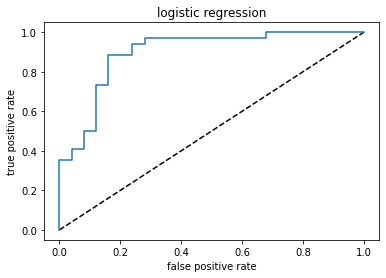

In [66]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('logistic regression')
plt.show()

In [68]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.8252941176470587

In [69]:
import joblib

In [70]:
joblib.dump(gnb,'predictedheartdisease.pkl')

['predictedheartdisease.pkl']